# Machine learning data analysis uses algorithms to continuously improve itself over time, but quality data is necessary for these models to operate efficiently. 

[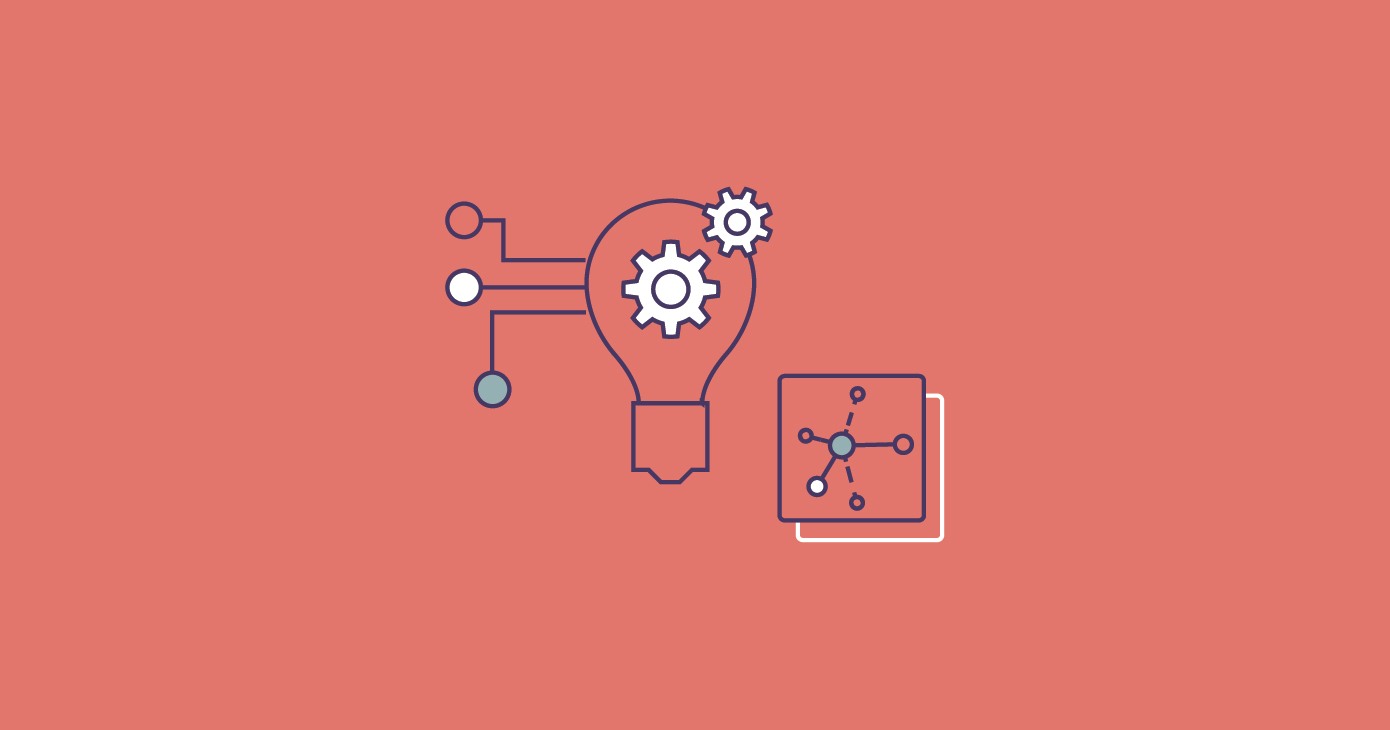](http://)

# Stroke Notebook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data.dropna(inplace=True)

In [ ]:
data.head()

In [ ]:
data.info()

# **We will anaylzed our dataset at work_type level**

In [ ]:
data['work_type'].unique()

# Lets go with Children

In [ ]:
children_df = data[data['work_type']=='children']
children_df.head()

In [ ]:
children_df['age'].plot(kind='hist')

# Children age less than 16

In [ ]:
sns.scatterplot(data=children_df, x="age", y="bmi")

In [ ]:
table = pd.pivot_table(children_df[children_df['gender']=='Female'],values='age',  index=['Residence_type','stroke'], aggfunc='count')
table
#  only one case of stroke in Female 
# Lets analyze them

In [ ]:

cut_bins = [0, 5, 10, 13, 17]
children_df['age_bin'] = pd.cut(children_df['age'], bins=cut_bins,labels=["0_5","5_10","10_13","13_17"])

In [ ]:
table = pd.pivot_table(children_df[children_df['gender']=='Female'],values=['bmi'],  index=['Residence_type','stroke'], aggfunc=['count','mean'])
print(table)
print('===================================================================')
table1 = pd.pivot_table(children_df[children_df['gender']=='Female'],values=['avg_glucose_level'],  index=['Residence_type','stroke'], aggfunc=['count','mean'])
print(table1)
#  bmi of stoke case is really high,  we know high bmi , high obesity , thus high chance of stroke
# low glucose level , more chances of stroke

# Govt_job Analysis

In [ ]:
Govt_df = data[data['work_type']=='Govt_job']
Govt_df.head()

**We have now many new factors to analyze**

In [ ]:
table = pd.pivot_table(Govt_df[Govt_df['gender']=='Female'],values=['bmi','avg_glucose_level'],  index=['stroke','smoking_status'], aggfunc=['mean'])
print('Female',table)
print('===================================================================')
table1 = pd.pivot_table(Govt_df[Govt_df['gender']=='Male'],values=['bmi','avg_glucose_level'],  index=['stroke','smoking_status'], aggfunc=['mean'])
print('Male',table1)
table1 = pd.pivot_table(Govt_df,values=['bmi','avg_glucose_level'],  index=['stroke','smoking_status'], aggfunc=['mean'])
print('Male',table1)

**We can take lot of insights from above
* Stoke people tends to have more  glucose level compare to people with no stoke
* People who smokes , tends to have low bmi thus low bmi because of smoking leads to stroke

In [ ]:
Govt_df['age'].plot(kind='hist')

In [ ]:

cut_bins = [17, 35, 50, 65, 85]
Govt_df['age_bin'] = pd.cut(Govt_df['age'], bins=cut_bins,labels=["17_35","35_50","50_65","65_85"])

# Important Charts

In [ ]:
sns.countplot(x='stroke',hue='age_bin', data=Govt_df)

In [ ]:
sns.countplot(x='hypertension',hue='age_bin', data=Govt_df) #heart_disease

In [ ]:
sns.countplot(x='heart_disease',hue='age_bin', data=Govt_df)

**Higher age results in Hypertension , Herat problems**

In [ ]:
sns.countplot(x='stroke',hue='work_type', data=data)

**This shows Private and selfe_employed People tends to have more stroke chances**

In [ ]:
table = pd.pivot_table(data[data['gender']=='Female'],values=['bmi','avg_glucose_level'],  index=['stroke','work_type'], aggfunc=['mean'])
print('Female',table)
print('===================================================================')
table1 = pd.pivot_table(data[data['gender']=='Male'],values=['bmi','avg_glucose_level'],  index=['stroke','work_type'], aggfunc=['mean'])
print('Male',table1)

# Thanks,  If you Like please upvote, it motivates me to write more code.